In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn
import h5py
particle = 'piplus'
torch.set_default_dtype(torch.float64)

## Flow (uniform)

In [2]:
fixed_energies = np.linspace(10,90,9)

myvals_uniform_1 = {}
myvals_uniform_res_1 = {}
myvals_uniform_resL_1 = {}
myvals_uniform_resR_1 = {}

source_dir = "/data/yp325/regression_project/data_uniform_densities/data_uniform_full/"
for i in range(9):
    myvals_uniform_1[fixed_energies[i]] = np.load(source_dir+"myvals_1_"+str(i)+".npy")
    myvals_uniform_res_1[fixed_energies[i]] = np.load(source_dir+"myvals_res_1_"+str(i)+".npy")
    myvals_uniform_resL_1[fixed_energies[i]] = np.load(source_dir+"myvals_resL_1_"+str(i)+".npy")
    myvals_uniform_resR_1[fixed_energies[i]] = np.load(source_dir+"myvals_resR_1_"+str(i)+".npy")

In [3]:
flow_prediction_uniform = {}
for ee in fixed_energies:
    flow_prediction_uniform[ee] = myvals_uniform_1[ee]
    
    
flow_yy1_uniform = []

for ee in fixed_energies:
    flow_yy1_uniform += [np.std(myvals_uniform_1[ee])/ee]
    
flow_zz1_uniform = []

for ee in fixed_energies:
    flow_zz1_uniform += [np.mean(myvals_uniform_res_1[ee])/ee]

flow_zz1L_uniform = []

for ee in fixed_energies:
    flow_zz1L_uniform += [np.mean(myvals_uniform_resL_1[ee])/ee]

flow_zz1R_uniform = []

for ee in fixed_energies:
    flow_zz1R_uniform += [np.mean(myvals_uniform_resR_1[ee])/ee]


/tmp/ipykernel_3877811/3378763697.py:3: RuntimeWarning: divide by zero encountered in divide
  to_plot = myvals_uniform_resL_1[ee]/myvals_uniform_resR_1[ee]


(0.0, 2.0)

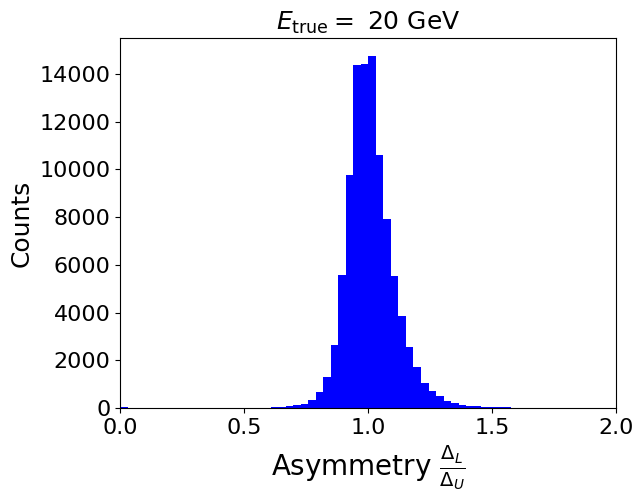

In [4]:
ee = 20
bins = np.linspace(0,3,100)
to_plot = myvals_uniform_resL_1[ee]/myvals_uniform_resR_1[ee]
#to_plot = to_plot[to_plot != np.inf]
_ = plt.hist(to_plot,bins=bins, color ='blue',density=False)
plt.title(r"$E_{\rm true} = $ 20 GeV",fontsize=18)
plt.xlabel(r"Asymmetry $\frac{\Delta_L}{\Delta_U}$", fontsize=20)
plt.ylabel("Counts", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.xlim([0,2])
#plt.savefig('asymmetry.png',dpi=300, bbox_inches='tight')

## Flow (log-uniform)

In [5]:
myvals_log_1 = {}
myvals_log_res_1 = {}
myvals_log_resL_1 = {}
myvals_log_resR_1 = {}

source_dir = "/data/yp325/regression_project/data_log_densities/data_log_full/"
for i in range(9):
    myvals_log_1[fixed_energies[i]] = np.load(source_dir+"myvals_1_"+str(i)+".npy")
    myvals_log_res_1[fixed_energies[i]] = np.load(source_dir+"myvals_res_1_"+str(i)+".npy")
    myvals_log_resL_1[fixed_energies[i]] = np.load(source_dir+"myvals_resL_1_"+str(i)+".npy")
    myvals_log_resR_1[fixed_energies[i]] = np.load(source_dir+"myvals_resR_1_"+str(i)+".npy")

In [6]:
flow_prediction_log = {}
for ee in fixed_energies:
    flow_prediction_log[ee] = myvals_log_1[ee]
    
    
flow_yy1_log = []

for ee in fixed_energies:
    flow_yy1_log += [np.std(myvals_log_1[ee])/ee]
    
flow_zz1_log = []

for ee in fixed_energies:
    flow_zz1_log += [np.mean(myvals_log_res_1[ee])/ee]

flow_zz1L_log = []

for ee in fixed_energies:
    flow_zz1L_log += [np.mean(myvals_log_resL_1[ee])/ee]

flow_zz1R_log = []

for ee in fixed_energies:
    flow_zz1R_log += [np.mean(myvals_log_resR_1[ee])/ee]

In [7]:
import scipy.stats as stats
import random

Flow (uniform)  10.0 0.990886588658866 0.004428587927554613
Flow (uniform)  10.0 0.1533536585365854 0.00034706023890593583
Flow (log)  10.0 0.9875637563756374 0.0022451688369058893
Flow (uniform)  20.0 0.9925517551755174 0.0026957971254816457
Flow (uniform)  20.0 0.12014857645403403 0.0002815024112958674
Flow (log)  20.0 0.9901740174017404 0.0018931037299916057
Flow (uniform)  30.0 0.9926567656765677 0.0023948310453547677
Flow (uniform)  30.0 0.10522983114446527 0.00034066226656505685
Flow (log)  30.0 0.992941794179418 0.0026024360159121415
Flow (uniform)  40.0 0.992956795679568 0.0016908993315743197
Flow (uniform)  40.0 0.09583823608505337 0.00035529502231408585
Flow (log)  40.0 0.9963696369636963 0.002608536145833554
Flow (uniform)  50.0 0.9995976896001046 0.0014966228764788207
Flow (uniform)  50.0 0.08666496873045659 0.00022455256362685134
Flow (log)  50.0 0.9975503178835707 0.0020912069516044454
Flow (uniform)  60.0 0.9901668497056082 0.0019474504420392987
Flow (uniform)  60.0 0.08

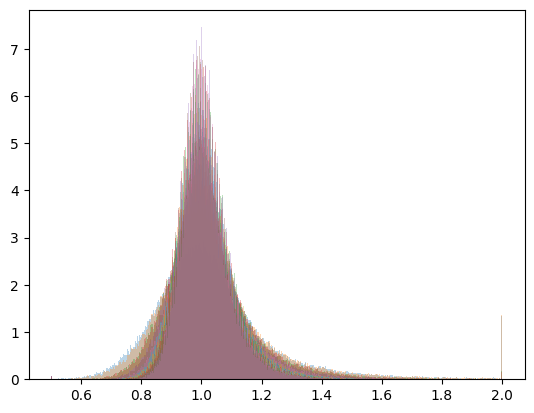

In [8]:
flow_uniform_mode = []
flow_uniform_mode_err = []

flow_log_mode = []
flow_log_mode_err = []

full_true_res_flow = [] #only save for uniform case
full_true_res_flow_err = []

bw_method = 'scott'

for E in fixed_energies:

######### flow (uniform) ##################    
    flow_uniform = flow_prediction_uniform[E]/E
    
    
    n_flow_uniform, bins_uni,_ = plt.hist(flow_uniform,bins=400,density=True,alpha=0.3,label='Flow')


    mode_array = []
    res_array = []
    asym_array = []
    for i in range(20):
        y = np.array(random.choices(flow_uniform.tolist(), k=100000)) # create bootstrap sample with 100k events (sample with replacement)
        kernel = stats.gaussian_kde(y,bw_method = bw_method) # KDE with gaussian kernel

        x_d = np.linspace(bins_uni[0],bins_uni[-1],10000)
        height = kernel.pdf(x_d)
        mode_value_temp = x_d[np.argmax(height)] # estimate mode of current bootstrap sample

        percentile_mode = stats.percentileofscore(flow_uniform, mode_value_temp)
        sigma_low = np.percentile(flow_uniform,percentile_mode-34,method = 'median_unbiased') 
        sigma_high = np.percentile(flow_uniform, percentile_mode+34, method = 'median_unbiased')
        true_res_flow_temp = (sigma_high-sigma_low)/2
        asym_temp = (mode_value_temp-sigma_low)/(sigma_high-mode_value_temp)
        if  i == 0: 
            mode_array = mode_value_temp.reshape(-1,1)
            res_array = true_res_flow_temp.reshape(-1,1)
            asym_array = asym_temp.reshape(-1,1)
        else: 
            mode_array = np.append(mode_array,mode_value_temp.reshape(-1,1),1)
            res_array = np.append(res_array,true_res_flow_temp.reshape(-1,1),1)
            asym_array = np.append(asym_array,asym_temp.reshape(-1,1),1)
        

    mode_value = mode_array.mean()
    mode_err = mode_array.std()
    flow_uniform_mode.append(mode_value)
    flow_uniform_mode_err.append(mode_err)
    
    true_res_value = res_array.mean()
    true_res_err = res_array.std()
    full_true_res_flow.append(true_res_value)
    full_true_res_flow_err.append(true_res_err)

    # true_asym_value = asym_array.mean()
    # true_asym_err = asym_array.std()
    # full_true_asym_flow.append(true_asym_value)
    # full_true_asym_flow_err.append(true_asym_err)

    print('Flow (uniform) ',E, mode_value, mode_err)
    print('Flow (uniform) ',E, true_res_value, true_res_err)
    #print('Flow (uniform) ',E, true_asym_value, true_asym_err)
    # sigma_low = np.percentile(flow_uniform,percentile_mode-34,method = 'median_unbiased') 
    # sigma_high = np.percentile(flow_uniform, percentile_mode+34, method = 'median_unbiased')
    # true_res_flow = (sigma_high-sigma_low)/2

    #full_true_res_flow.append(true_res_flow)

  ######### flow (log-uniform) ##################

    flow_log = flow_prediction_log[E]/E
    
    
    n_flow_log, bins_log,_ = plt.hist(flow_log,bins=400,density=True,alpha=0.3,label='Flow')


    mode_array = []
    for i in range(20):
        y = np.array(random.choices(flow_log.tolist(), k=100000)) # create bootstrap sample with 100k events (sample with replacement)
        kernel = stats.gaussian_kde(y,bw_method = bw_method) # KDE with gaussian kernel

        x_d = np.linspace(bins_log[0],bins_log[-1],10000)
        height = kernel.pdf(x_d)
        mode_value_temp = x_d[np.argmax(height)] # estimate mode of current bootstrap sample
        if  i == 0: mode_array = mode_value_temp.reshape(-1,1)
        else: mode_array = np.append(mode_array,mode_value_temp.reshape(-1,1),1)

    mode_value = mode_array.mean()
    mode_err = mode_array.std()
    flow_log_mode.append(mode_value)
    flow_log_mode_err.append(mode_err)

    print('Flow (log) ',E, mode_value, mode_err)



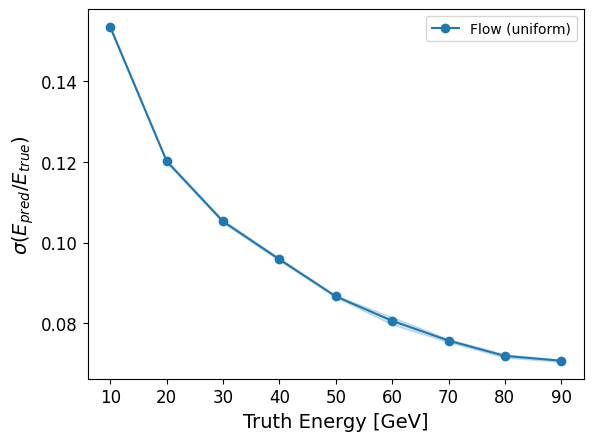

In [9]:
plt.plot(fixed_energies,full_true_res_flow,label="Flow (uniform)",color="tab:blue", marker='o',markersize=6)
plt.fill_between(fixed_energies, np.array(full_true_res_flow)-np.array(full_true_res_flow_err), np.array(full_true_res_flow)+np.array(full_true_res_flow_err),color="tab:blue",alpha=0.2)
plt.legend()
plt.xlabel("Truth Energy [GeV]",fontsize =14)
plt.ylabel("$\sigma(E_{pred} / E_{true})$",fontsize =14)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.savefig('resolution.png',dpi=300, bbox_inches='tight')

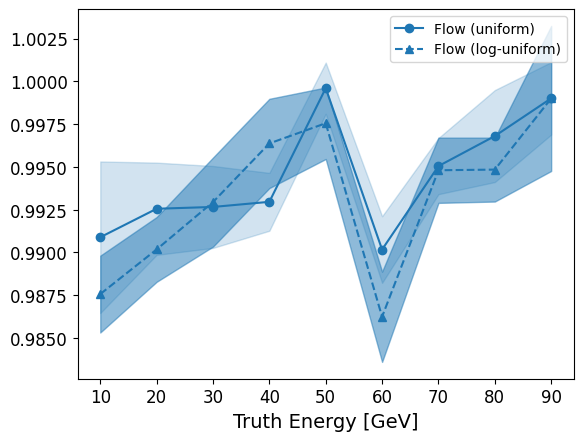

In [10]:
plt.plot(fixed_energies,flow_uniform_mode,label="Flow (uniform)",color="tab:blue", marker='o',markersize=6)

plt.fill_between(fixed_energies, np.array(flow_uniform_mode)-np.array(flow_uniform_mode_err), np.array(flow_uniform_mode)+np.array(flow_uniform_mode_err),color="tab:blue",alpha=0.2)

plt.plot(fixed_energies,flow_log_mode,label="Flow (log-uniform)",color="tab:blue", marker='^',markersize=6, linestyle='--')


plt.fill_between(fixed_energies, np.array(flow_log_mode)-np.array(flow_log_mode_err), np.array(flow_log_mode)+np.array(flow_log_mode_err),color="tab:blue",alpha=0.5)

plt.legend()
plt.xlabel("Truth Energy [GeV]",fontsize =14)

plt.tick_params(axis='both', which='major', labelsize=12)


In [11]:
np.save("precious_results_mode/try_1/flow_uniform_mode",flow_uniform_mode)
np.save("precious_results_mode/try_1/flow_uniform_mode_err",flow_uniform_mode_err)
np.save("precious_results_mode/try_1/flow_uniform_true_res",full_true_res_flow)
np.save("precious_results_mode/try_1/flow_uniform_true_res_err",full_true_res_flow_err)

np.save("precious_results_mode/try_1/flow_log_mode",flow_log_mode)
np.save("precious_results_mode/try_1/flow_log_mode_err",flow_log_mode_err)

In [3]:
uni_mode_try1 = np.load("precious_results_mode/try_1/flow_uniform_mode.npy")
uni_mode_err_try1 = np.load("precious_results_mode/try_1/flow_uniform_mode_err.npy")
res_try1 = np.load("precious_results_mode/try_1/flow_uniform_true_res.npy")
res_err_try1 = np.load("precious_results_mode/try_1/flow_uniform_true_res_err.npy")

log_mode_try1 = np.load("precious_results_mode/try_1/flow_log_mode.npy")
log_mode_err_try1 = np.load("precious_results_mode/try_1/flow_log_mode_err.npy")

In [12]:
res_pred_arr = []
res_pred_err_arr = []
for i in range(9):
    res_pred = myvals_uniform_res_1[fixed_energies[i]].mean()/fixed_energies[i]
    res_pred_err = myvals_uniform_res_1[fixed_energies[i]].std()/fixed_energies[i]
    if i == 0 : 
        res_pred_arr = res_pred.reshape(-1,1)
        res_pred_err_arr = res_pred_err.reshape(-1,1)
    else: 
        res_pred_arr = np.append(res_pred_arr,res_pred)
        res_pred_err_arr = np.append(res_pred_err_arr,res_pred_err)

(0.0, 0.22)

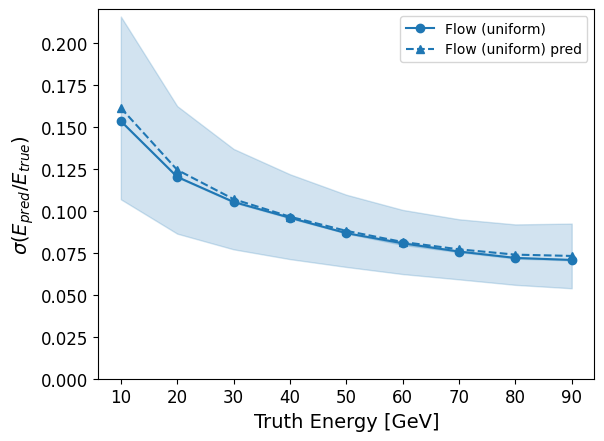

In [14]:
plt.plot(fixed_energies,res_try1,label="Flow (uniform)",color="tab:blue", marker='o',markersize=6)
plt.fill_between(fixed_energies, np.array(res_try1)-np.array(res_err_try1), np.array(res_try1)+np.array(res_err_try1),color="tab:blue",alpha=0.2)
plt.plot(fixed_energies,res_pred_arr,label="Flow (uniform) pred",color="tab:blue", marker='^',ls='--',markersize=6)
plt.fill_between(fixed_energies, np.array(res_pred_arr)-np.array(res_pred_err_arr), np.array(res_pred_arr)+np.array(res_pred_err_arr),color="tab:blue",alpha=0.2)


plt.legend()
plt.xlabel("Truth Energy [GeV]",fontsize =14)
plt.ylabel("$\sigma(E_{pred} / E_{true})$",fontsize =14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylim([0,.22])

(0.97, 1.005)

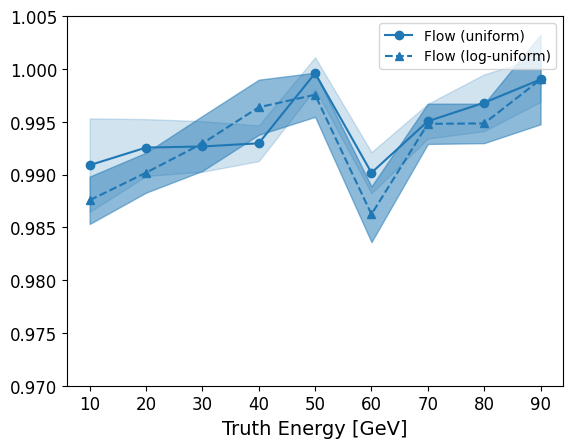

In [14]:
plt.plot(fixed_energies,uni_mode_try1,label="Flow (uniform)",color="tab:blue", marker='o',markersize=6)

plt.fill_between(fixed_energies, np.array(uni_mode_try1)-np.array(uni_mode_err_try1), np.array(uni_mode_try1)+np.array(uni_mode_err_try1),color="tab:blue",alpha=0.2)

plt.plot(fixed_energies,log_mode_try1,label="Flow (log-uniform)",color="tab:blue", marker='^',markersize=6, linestyle='--')

plt.fill_between(fixed_energies, np.array(log_mode_try1)-np.array(log_mode_err_try1), np.array(log_mode_try1)+np.array(log_mode_err_try1),color="tab:blue",alpha=0.5)

plt.legend()
plt.xlabel("Truth Energy [GeV]",fontsize =14)

plt.tick_params(axis='both', which='major', labelsize=12)

plt.ylim([0.970,1.005])
